# Importing

In [193]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import pickle
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score


In [194]:
data = pd.read_csv(open('/Users/quagrain/Library/CloudStorage/OneDrive-AshesiUniversity/Resource/CS/CS 254 - Intro to AI/datasets/CustomerChurn_dataset.csv'))

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [196]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.drop(columns='customerID', inplace=True)

`customerID` is irrelevant because it is a unique identifier so it won't be useful when training the model.

In [197]:
data.count()

gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

In [198]:
data.dropna(inplace=True)

Remove the null values in the dataset since there are only 11.

In [199]:
# categorical_cols = [i for i in data.columns if data[i].dtype=='O']
categorical_cols = []
encoded = []
for i in data.columns:
    if data[i].dtype =='O':
        categorical_cols.append(i)


To get all the categorical values that will be plotted against churn to determine the relationship.

In [200]:
train_data = data

In [201]:
for col in categorical_cols:
    l = LabelEncoder()
    train_data[col] = l.fit_transform(train_data[col])
    encoded.append(l)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depreca

Encode all categorical columns

# Exploratory Data Analysis

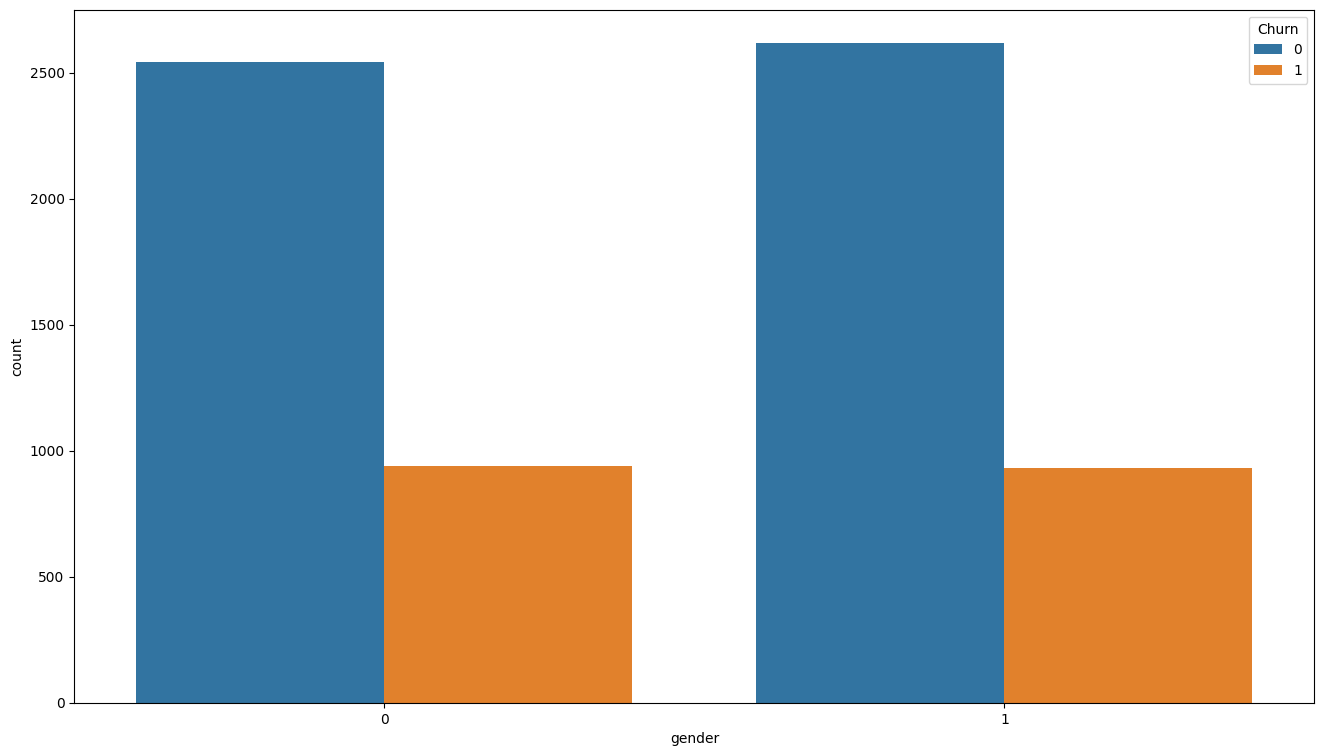

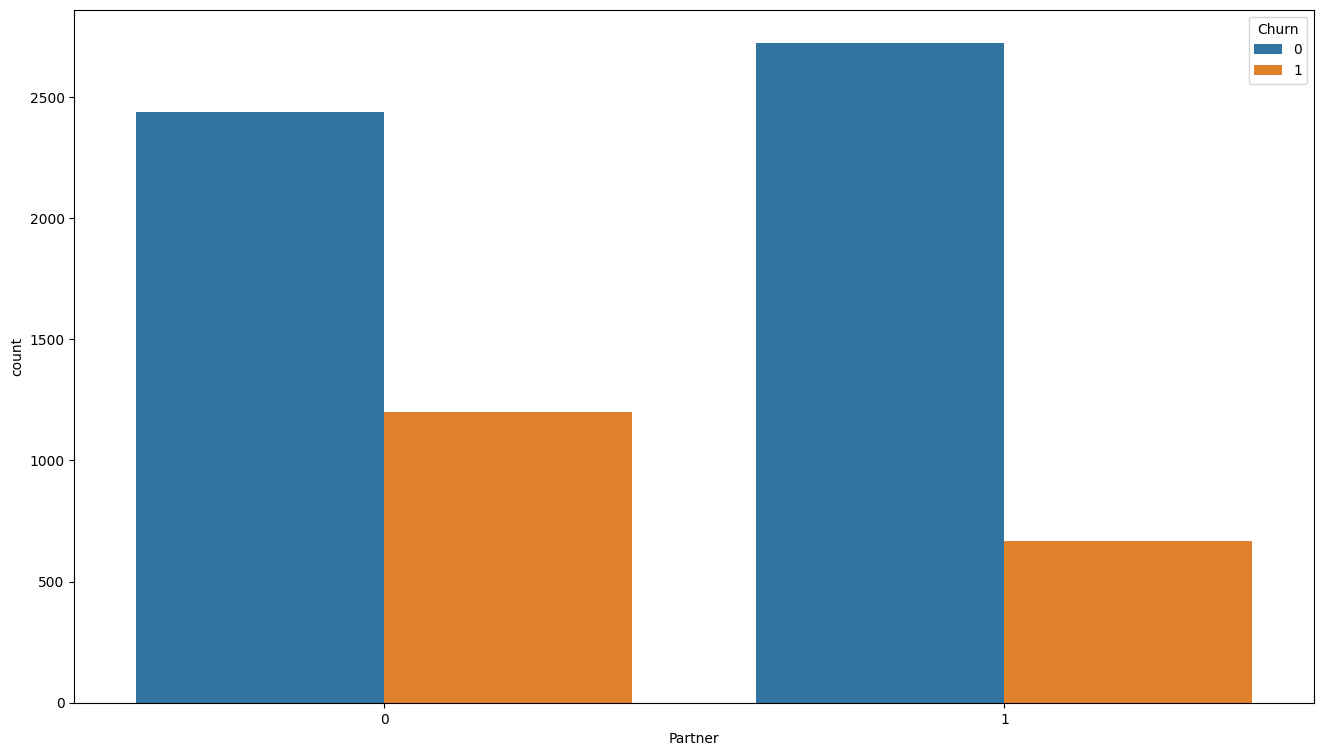

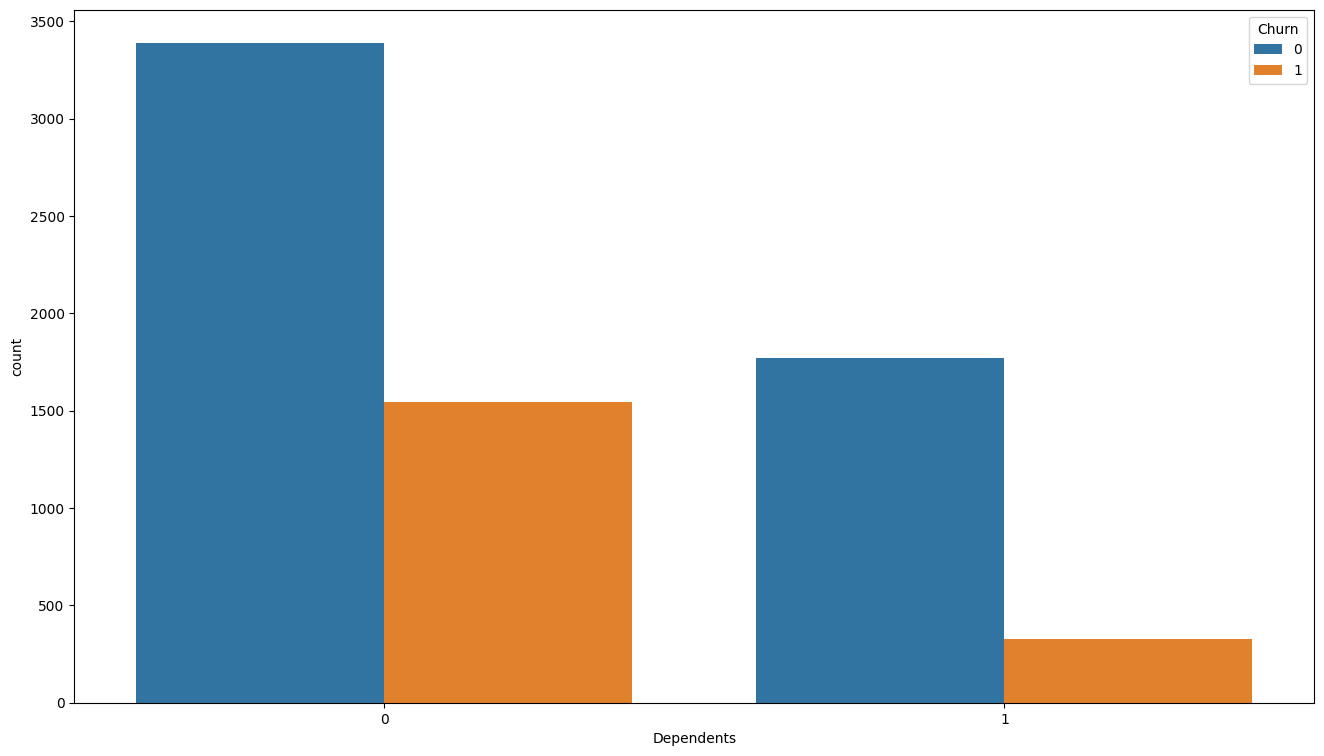

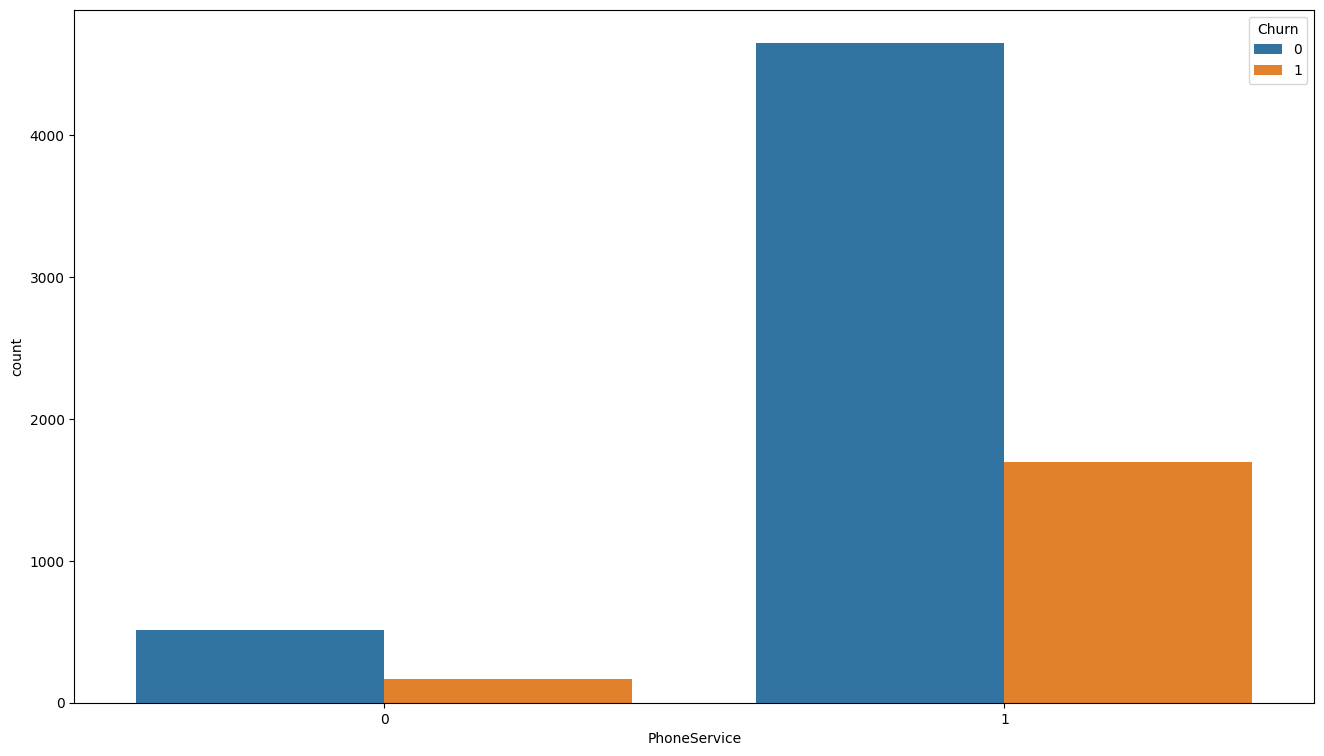

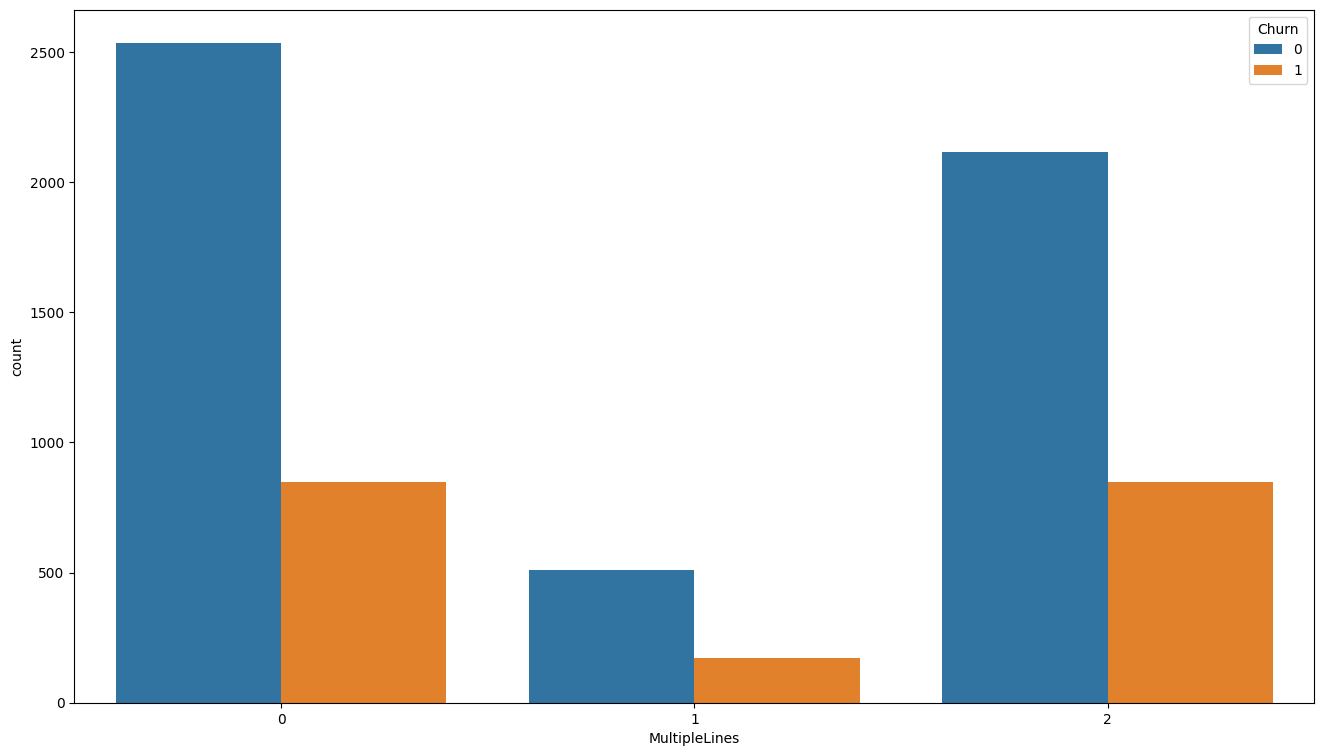

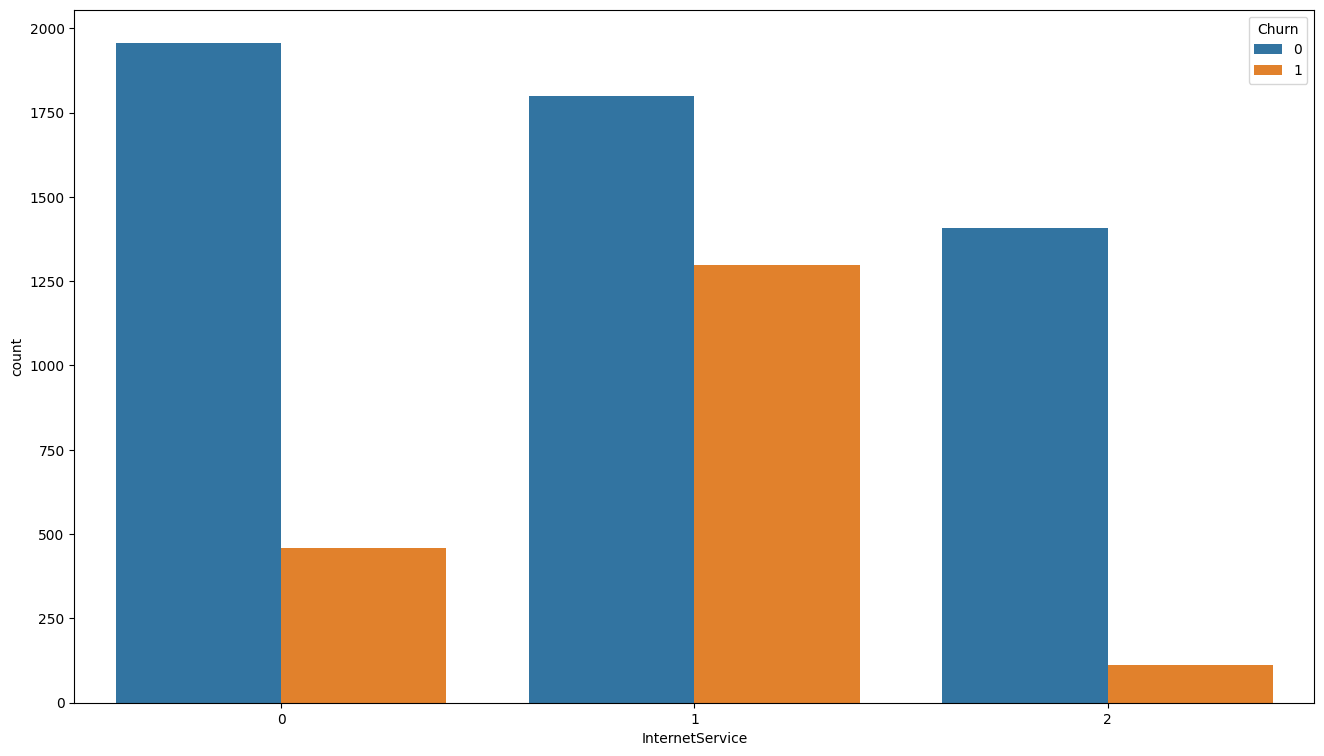

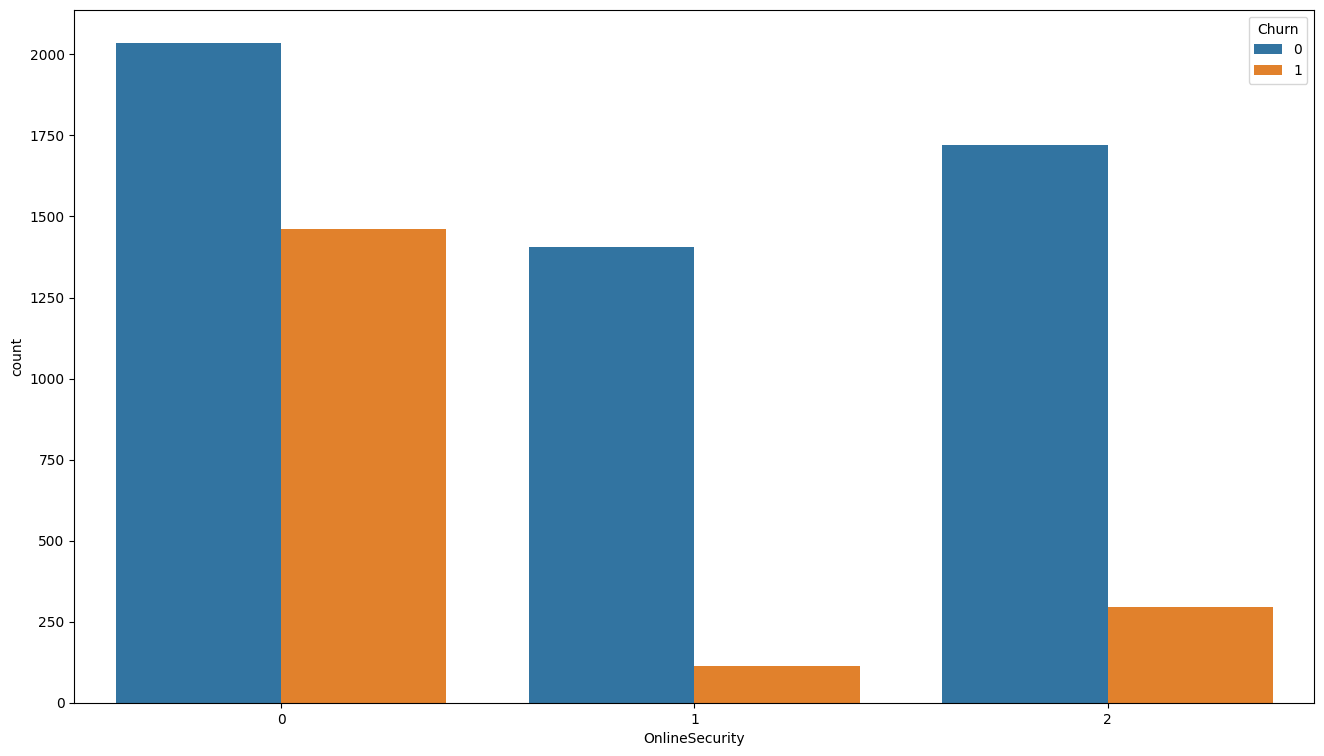

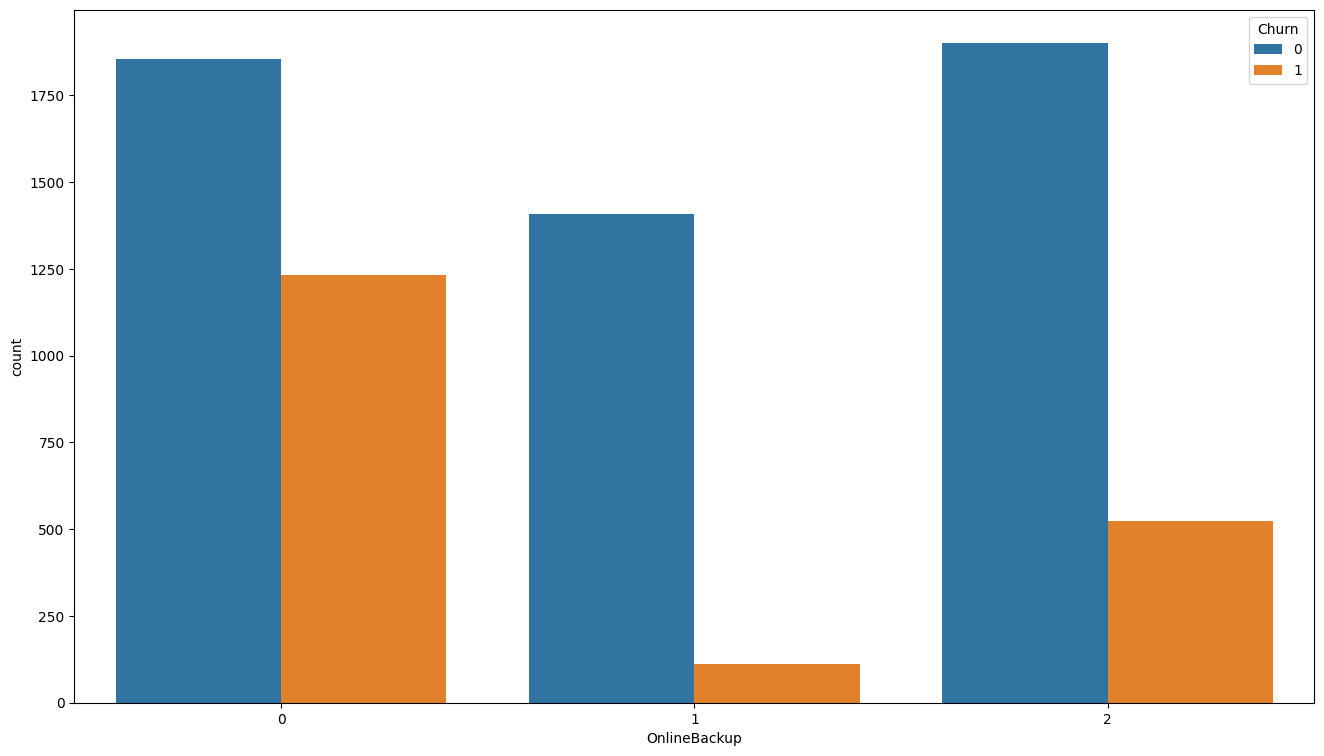

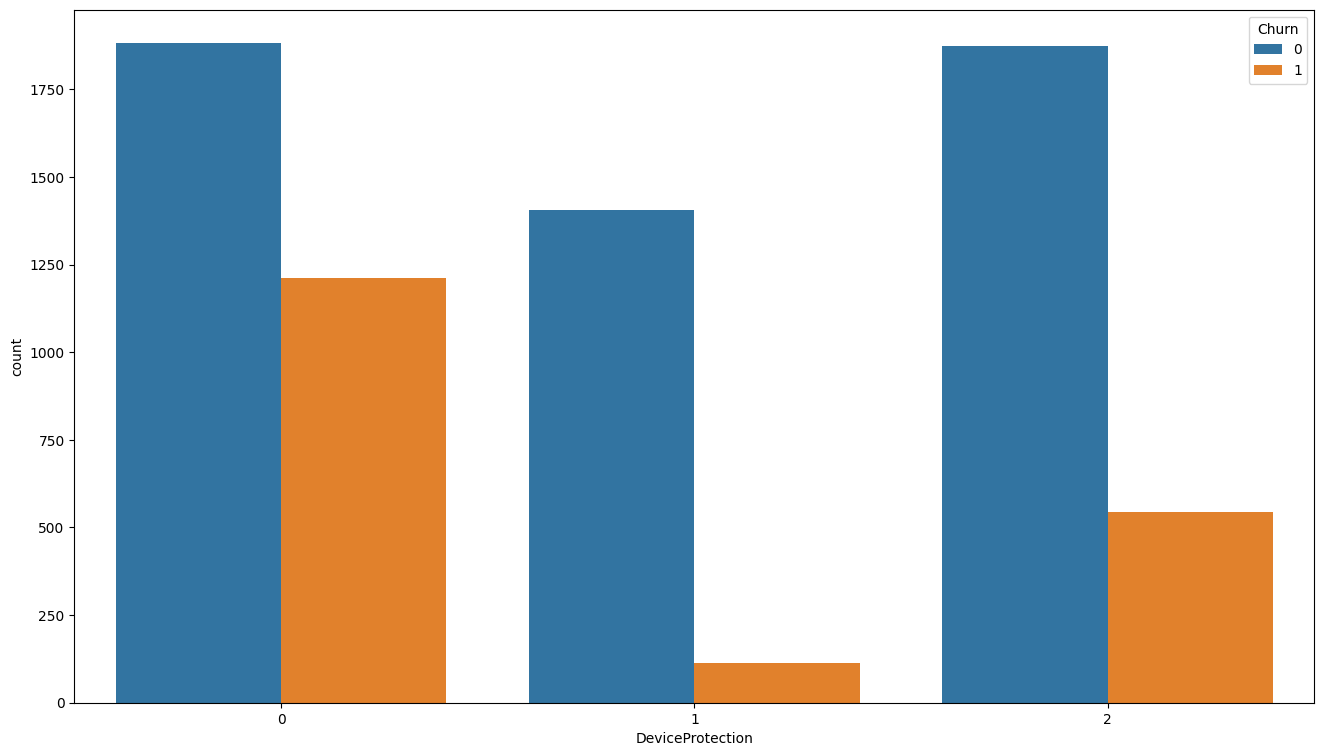

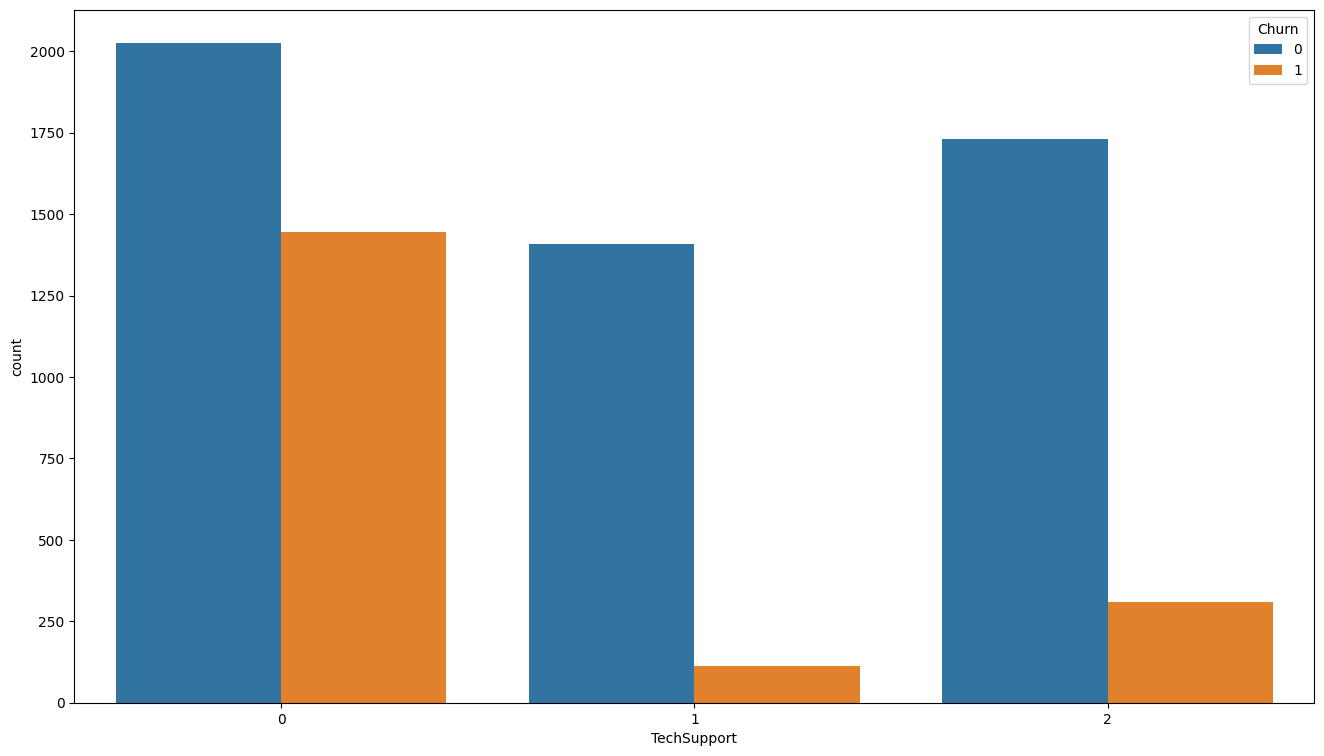

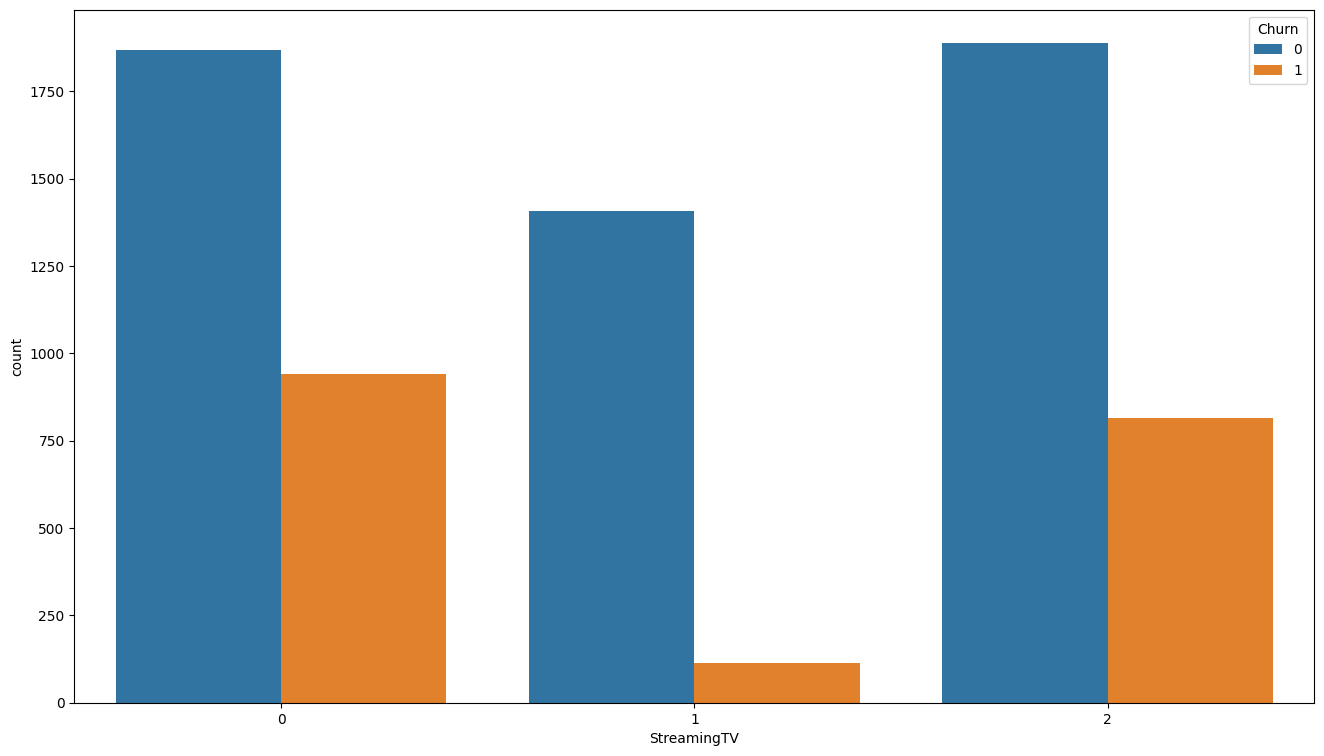

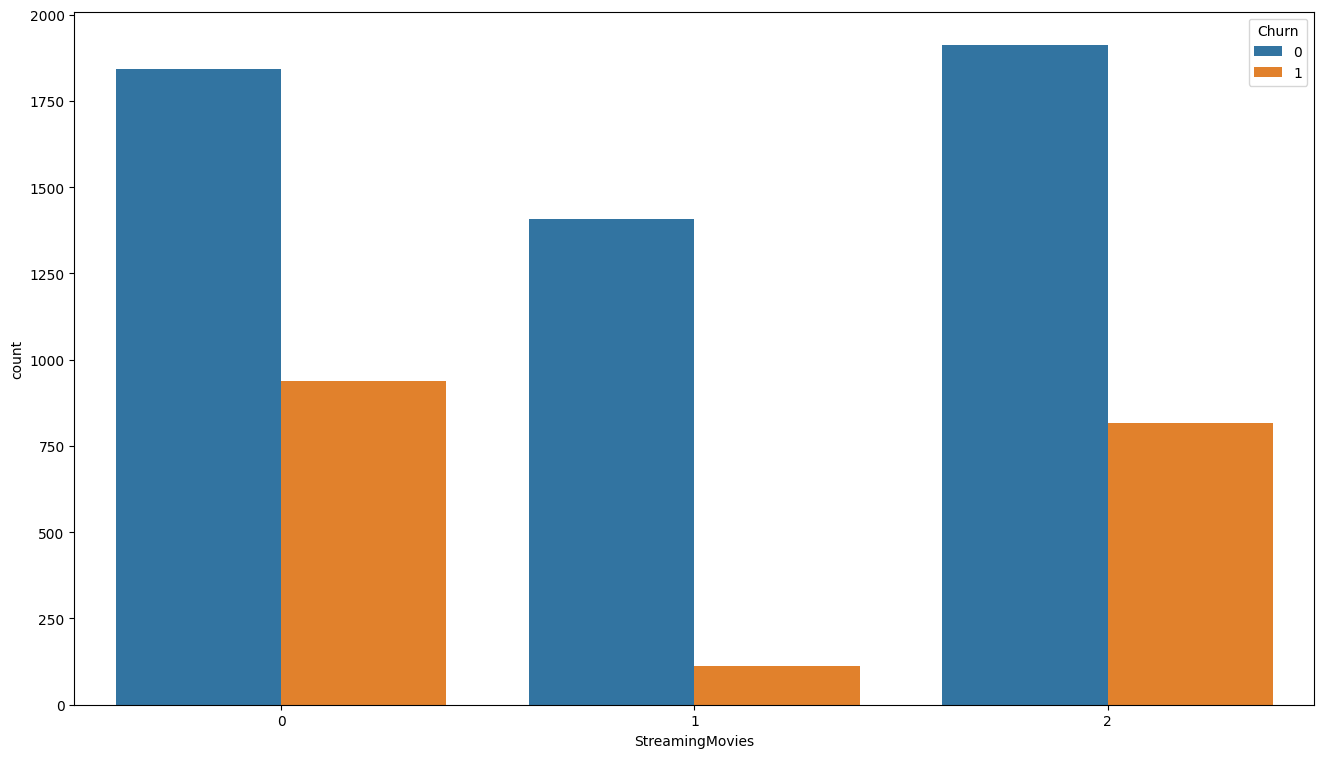

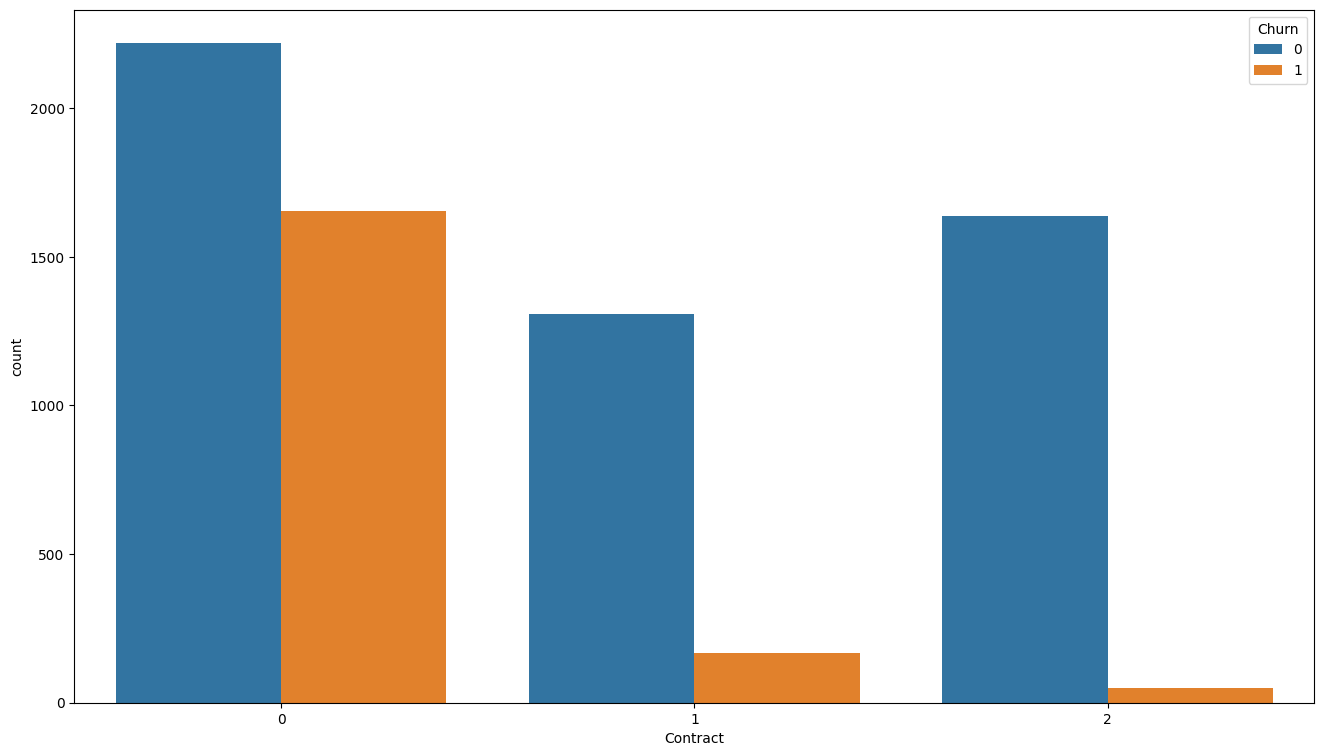

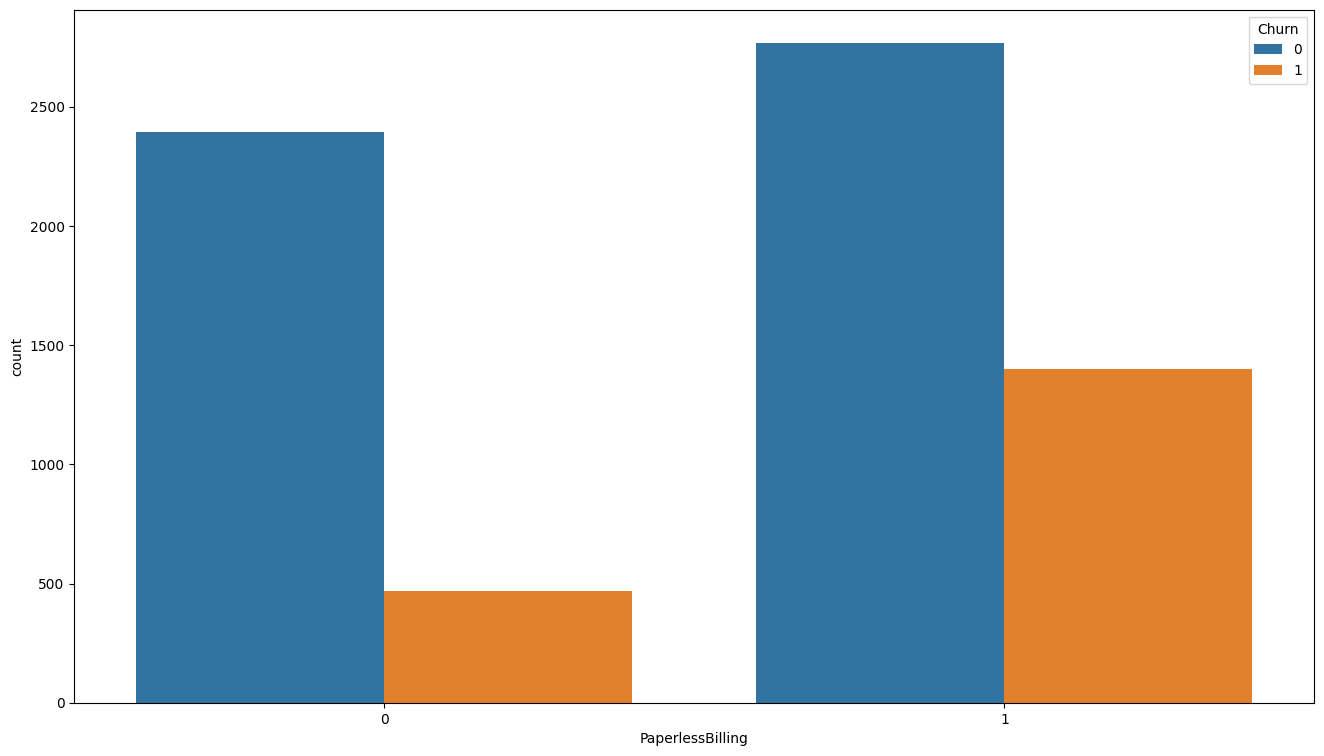

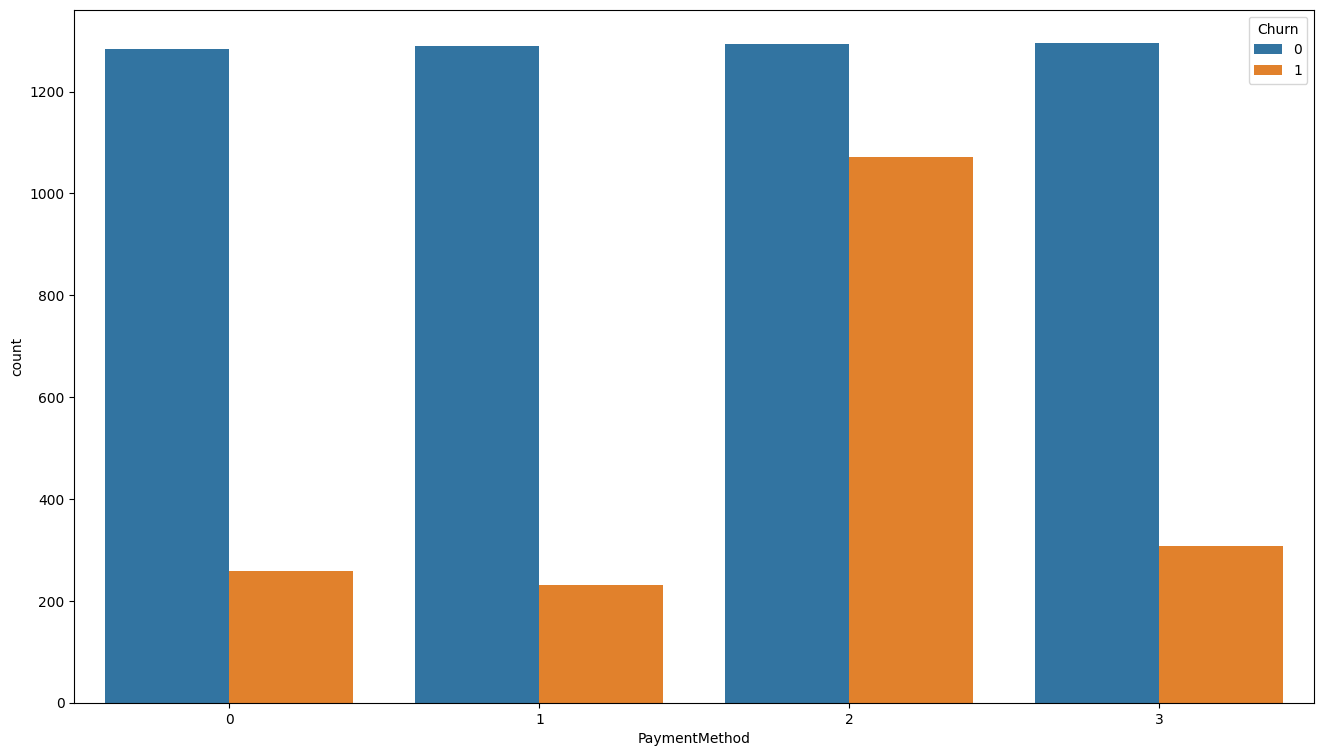

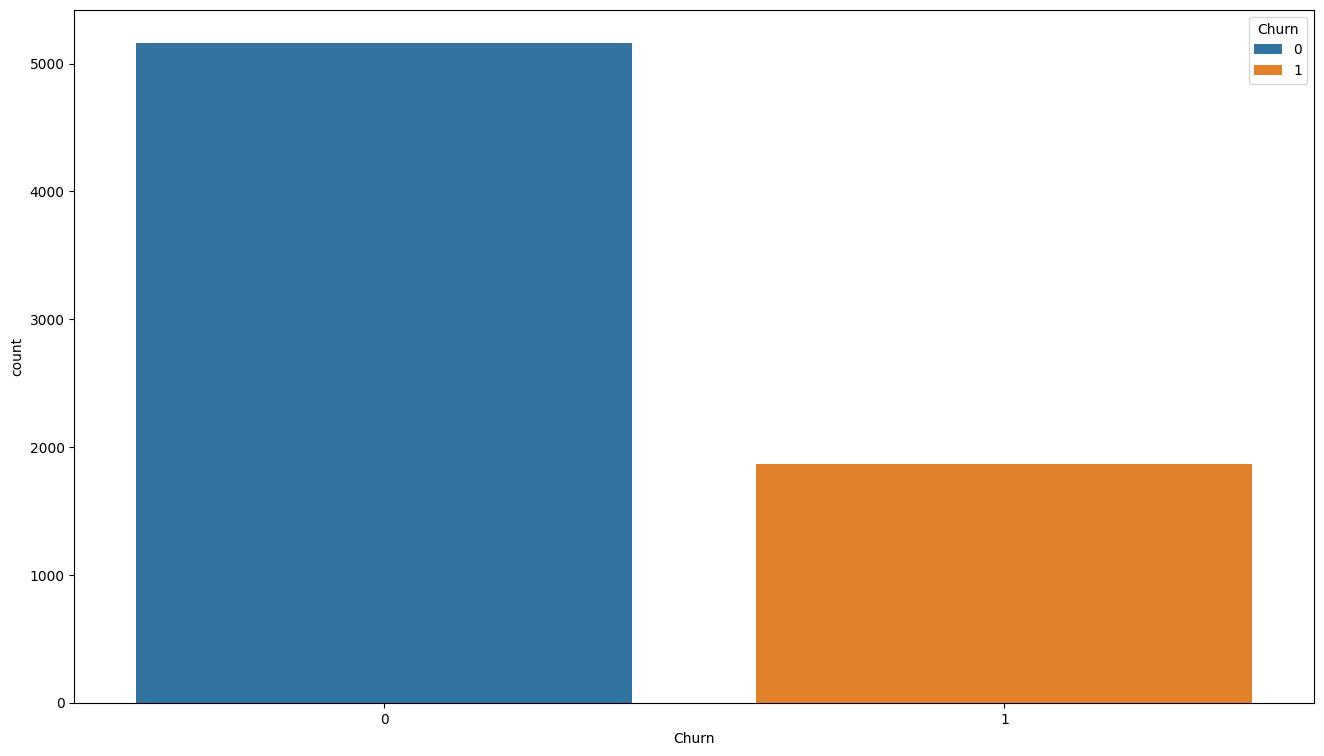

In [202]:
def plot_graphs(column):
    fig, subplots = plt.subplots(1, 1, figsize=(16,9))
    sb.countplot(x=column, hue='Churn', data=data)

for i in range(len(categorical_cols)):
    plot_graphs(categorical_cols[i])

A person who is more likely to churn has: no partners, no dependents, phone service, fiber optic internet service, no online security, no online backup, no device protection, no tech support, no streaming service, a monthly contract, paperless billing and an electronic check.




# Training

In [203]:
y = train_data['Churn']
x = train_data.drop("Churn", axis=1)

In [204]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=8)

selector.fit_transform(x, y)

selected_feature_names = x.columns[selector.get_support()]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

In [205]:
x = x[selected_feature_names]
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [207]:
input_layer = Input(shape=(x_train.shape[1],))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(8, activation='relu')(hidden_layer2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer3)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='sgd', loss=binary_crossentropy, metrics=['accuracy'])

Epoch 1/50


176/176 [==============================] - 1s 1ms/step - loss: 0.5778 - accuracy: 0.7292 - val_loss: 0.5090 - val_accuracy: 0.7342
Epoch 2/50
176/176 [==============================] - 0s 995us/step - loss: 0.4759 - accuracy: 0.7595 - val_loss: 0.4602 - val_accuracy: 0.7754
Epoch 3/50
176/176 [==============================] - 0s 914us/step - loss: 0.4467 - accuracy: 0.7908 - val_loss: 0.4484 - val_accuracy: 0.7783
Epoch 4/50
176/176 [==============================] - 0s 840us/step - loss: 0.4373 - accuracy: 0.7948 - val_loss: 0.4434 - val_accuracy: 0.7790
Epoch 5/50
176/176 [==============================] - 0s 887us/step - loss: 0.4324 - accuracy: 0.7956 - val_loss: 0.4407 - val_accuracy: 0.7783
Epoch 6/50
176/176 [==============================] - 0s 878us/step - loss: 0.4290 - accuracy: 0.7964 - val_loss: 0.4388 - val_accuracy: 0.7818
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7977 - val_loss: 0.4380 - val_accuracy: 0.7797
Epoch 8

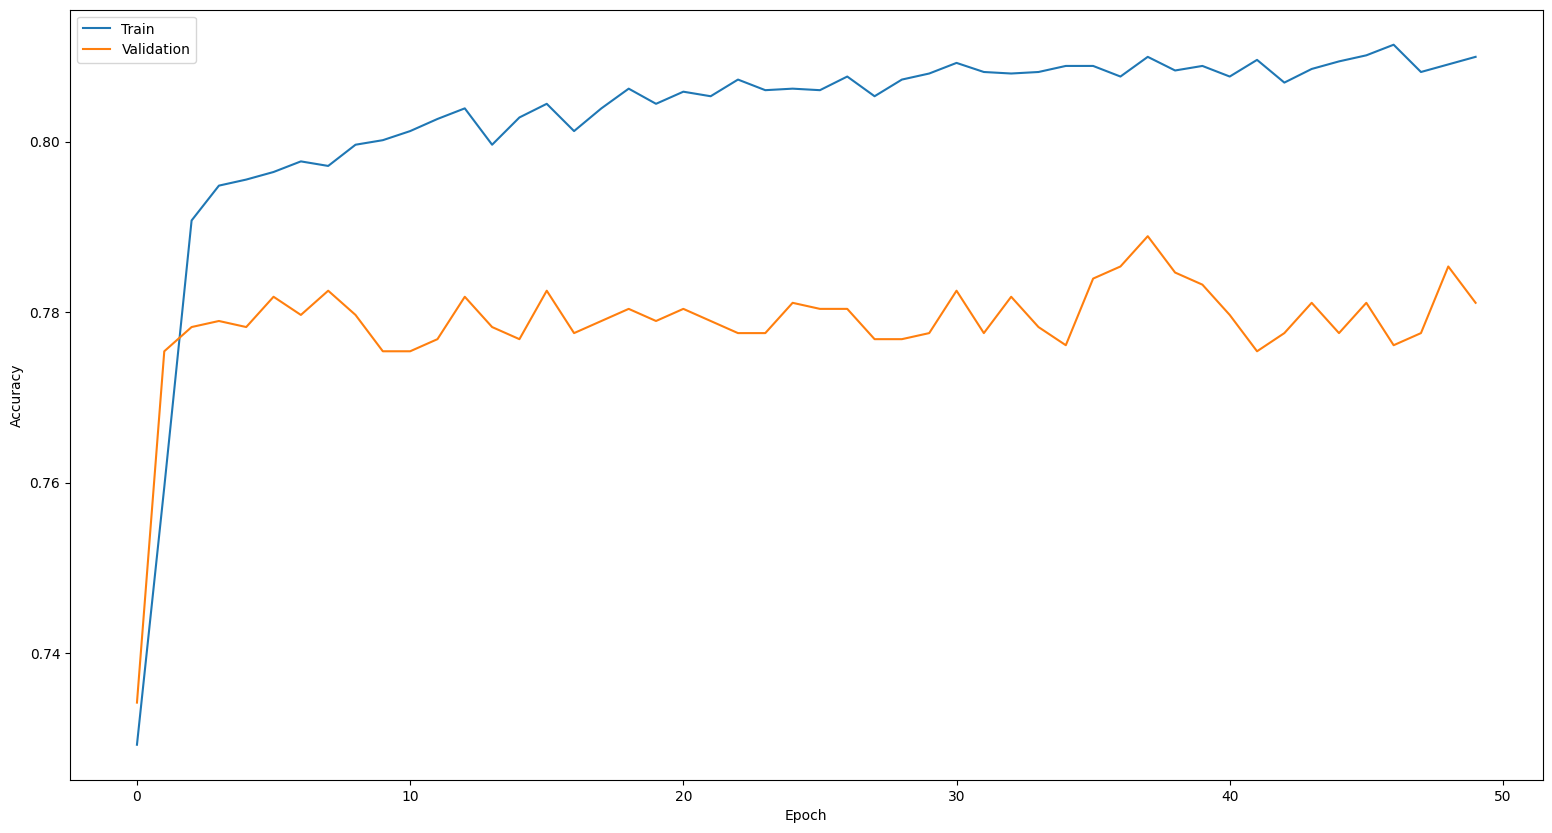

In [208]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
# sgd - 0.82, 0.80
plt.figure(figsize=(19, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

In [209]:
def create_model(optimizer='sgd', loss=binary_crossentropy,hidden_layer_sizes=(64,), activation='relu', metrics=['accuracy']):
    input_layer = Input(shape=(x.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    hidden_layer3 = Dense(8, activation='relu')(hidden_layer2)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer3)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [210]:
# Grid test
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, loss=binary_crossentropy,verbose=0, validation_split=0.1)

param_grid = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'validation_split': [0.1, 0.2]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depreca

In [ ]:
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = best_model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

In [ ]:
print("AUC Score: ", auc_score)
print("Test Accuracy: ", accuracy)

AUC Score:  0.837369480926226
Test Accuracy:  0.7860696517412935


In [ ]:
grid_result.best_params_

{'batch_size': 10, 'epochs': 10, 'validation_split': 0.2}

In [ ]:
def create_model(dropout_rate=0.2, loss=binary_crossentropy, metrics=['accuracy']):
    input_layer = Input(shape=(x.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    dropout_1 = Dropout(dropout_rate)(hidden_layer1)
    hidden_layer2 = Dense(32, activation='relu')(dropout_1)
    dropout_2 = Dropout(dropout_rate)(hidden_layer2)
    hidden_layer3 = Dense(8, activation='relu')(dropout_2)
    dropout_3 = Dropout(dropout_rate)(hidden_layer3)
    output_layer = Dense(1, activation='sigmoid')(dropout_3)

    model = Model(inputs=input_layer, outputs=output_layer)
    opt = Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss=loss, metrics=metrics)

    return model

In [ ]:
save_model = create_model()
save_hist = save_model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
450/450 [==============================] - 1s 1ms/step - loss: 0.4742 - accuracy: 0.7649 - val_loss: 0.4263 - val_accuracy: 0.8000
Epoch 2/10
450/450 [==============================] - 0s 862us/step - loss: 0.4562 - accuracy: 0.7742 - val_loss: 0.4318 - val_accuracy: 0.7751
Epoch 3/10
450/450 [==============================] - 0s 847us/step - loss: 0.4549 - accuracy: 0.7833 - val_loss: 0.4245 - val_accuracy: 0.7920
Epoch 4/10
450/450 [==============================] - 0s 848us/step - loss: 0.4563 - accuracy: 0.7764 - val_loss: 0.4223 - val_accuracy: 0.7956
Epoch 5/10
450/450 [==============================] - 0s 842us/step - loss: 0.4486 - accuracy: 0.7824 - val_loss: 0.4205 - val_accuracy: 0.7929
Epoch 6/10
450/450 [==============================] - 0s 850us/step - loss: 0.4478 - accuracy: 0.7860 - val_loss: 0.4240 - val_accuracy: 0.7876
Epoch 7/10
450/450 [==============================] - 0s 995us/step - loss: 0.4463 - accuracy: 0.7898 - val_loss: 0.4167 - val_accuracy: 0

In [ ]:
y_pred = best_model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

In [ ]:
print(auc_score)

0.837369480926226


In [ ]:
save_model.save('best_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x.columns

Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

with open('encode.pkl', 'wb') as file:
    pickle.dump(l, file)

In [ ]:
encoders_dict = {}
for index, col in enumerate(categorical_cols):
  if col in data.columns:
    encoders_dict[col] = encoded[index]


filename = '/content/drive/My Drive/Colab Notebooks/Introduction_To_AI/Assignment3_ChurnPrediction/encoders_dict.pkl'
pickle.dump(encoders_dict, open(filename, 'wb'))